In [1]:
import pandas as pd

file_path = "nba_2022-23_all_stats_with_salary.csv"
df = pd.read_csv(file_path)
print(df.head())

   Unnamed: 0        Player Name    Salary Position  Age     Team  GP  GS  \
0           0      Stephen Curry  48070014       PG   34      GSW  56  56   
1           1          John Wall  47345760       PG   32      LAC  34   3   
2           2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24   
3           3       LeBron James  44474988       PF   38      LAL  55  54   
4           4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47   

     MP    FG  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  
0  34.7  10.0  ...  12.5  31.0  5.8  2.0  7.8  0.192   7.5   0.1  7.5   4.7  
1  22.2   4.1  ...  17.1  27.0 -0.4  0.7  0.3  0.020  -0.8  -0.4 -1.2   0.1  
2  29.1   5.9  ...  18.4  27.7 -0.6  2.6  1.9  0.044   0.3  -0.1  0.2   1.2  
3  35.5  11.1  ...  11.6  33.3  3.2  2.4  5.6  0.138   5.5   0.6  6.1   4.0  
4  35.6  10.3  ...  13.4  30.7  4.7  2.1  6.8  0.194   6.0   1.2  7.1   3.9  

[5 rows x 52 columns]


In [2]:
fg_percentage_columns = ['FG%', '2P%', '3P%', 'FT%', 'eFG%', 'TS%']

df[fg_percentage_columns] = df[fg_percentage_columns].fillna(0)
print(df.head())

   Unnamed: 0        Player Name    Salary Position  Age     Team  GP  GS  \
0           0      Stephen Curry  48070014       PG   34      GSW  56  56   
1           1          John Wall  47345760       PG   32      LAC  34   3   
2           2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24   
3           3       LeBron James  44474988       PF   38      LAL  55  54   
4           4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47   

     MP    FG  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  
0  34.7  10.0  ...  12.5  31.0  5.8  2.0  7.8  0.192   7.5   0.1  7.5   4.7  
1  22.2   4.1  ...  17.1  27.0 -0.4  0.7  0.3  0.020  -0.8  -0.4 -1.2   0.1  
2  29.1   5.9  ...  18.4  27.7 -0.6  2.6  1.9  0.044   0.3  -0.1  0.2   1.2  
3  35.5  11.1  ...  11.6  33.3  3.2  2.4  5.6  0.138   5.5   0.6  6.1   4.0  
4  35.6  10.3  ...  13.4  30.7  4.7  2.1  6.8  0.194   6.0   1.2  7.1   3.9  

[5 rows x 52 columns]


In [3]:
print("DataFrame Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

object_cols = df.select_dtypes(include=['object']).columns
print("\nObject-Type Columns:")
print(object_cols)

for col in object_cols:
    unique_values = df[col].unique()
    print(f"\nUnique values in {col}:")
    print(unique_values)

print("\nReplacing missing values with 0 for columns representing percentages.")
df.fillna(value=0, inplace=True)

print("\nShape of cleaned DataFrame:", df.shape)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     467 non-null    int64  
 1   Player Name    467 non-null    object 
 2   Salary         467 non-null    int64  
 3   Position       467 non-null    object 
 4   Age            467 non-null    int64  
 5   Team           467 non-null    object 
 6   GP             467 non-null    int64  
 7   GS             467 non-null    int64  
 8   MP             467 non-null    float64
 9   FG             467 non-null    float64
 10  FGA            467 non-null    float64
 11  FG%            467 non-null    float64
 12  3P             467 non-null    float64
 13  3PA            467 non-null    float64
 14  3P%            467 non-null    float64
 15  2P             467 non-null    float64
 16  2PA            467 non-null    float64
 17  2P%            467 non-null    float64

### Explanation for Replacing Null Values with Zero

We replaced null values with zero for columns representing percentages. The reason behind this decision is that missing values in these columns likely indicate zero performance rather than truly missing data. For instance, if a player attempted no free throws, their free throw percentage would be 0%.

### Features that Could be Numerical but are Objects

Upon inspecting the dataset, we noticed a few features that are of object data type but could potentially be numerical. These features include player positions and team names that could be encoded numerically for further analysis or modeling purposes.

# Splitting the Dataframe

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X = df.drop(columns=['Salary', 'Player Name', 'Team'])
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train[['Age', 'PTS', 'TRB', 'AST']])

X_test_poly = poly.transform(X_test[['Age', 'PTS', 'TRB', 'AST']])

print("Shape of X_train_poly:", X_train_poly.shape)
print("Shape of X_test_poly:", X_test_poly.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train_poly: (350, 35)
Shape of X_test_poly: (117, 35)
Shape of y_train: (350,)
Shape of y_test: (117,)


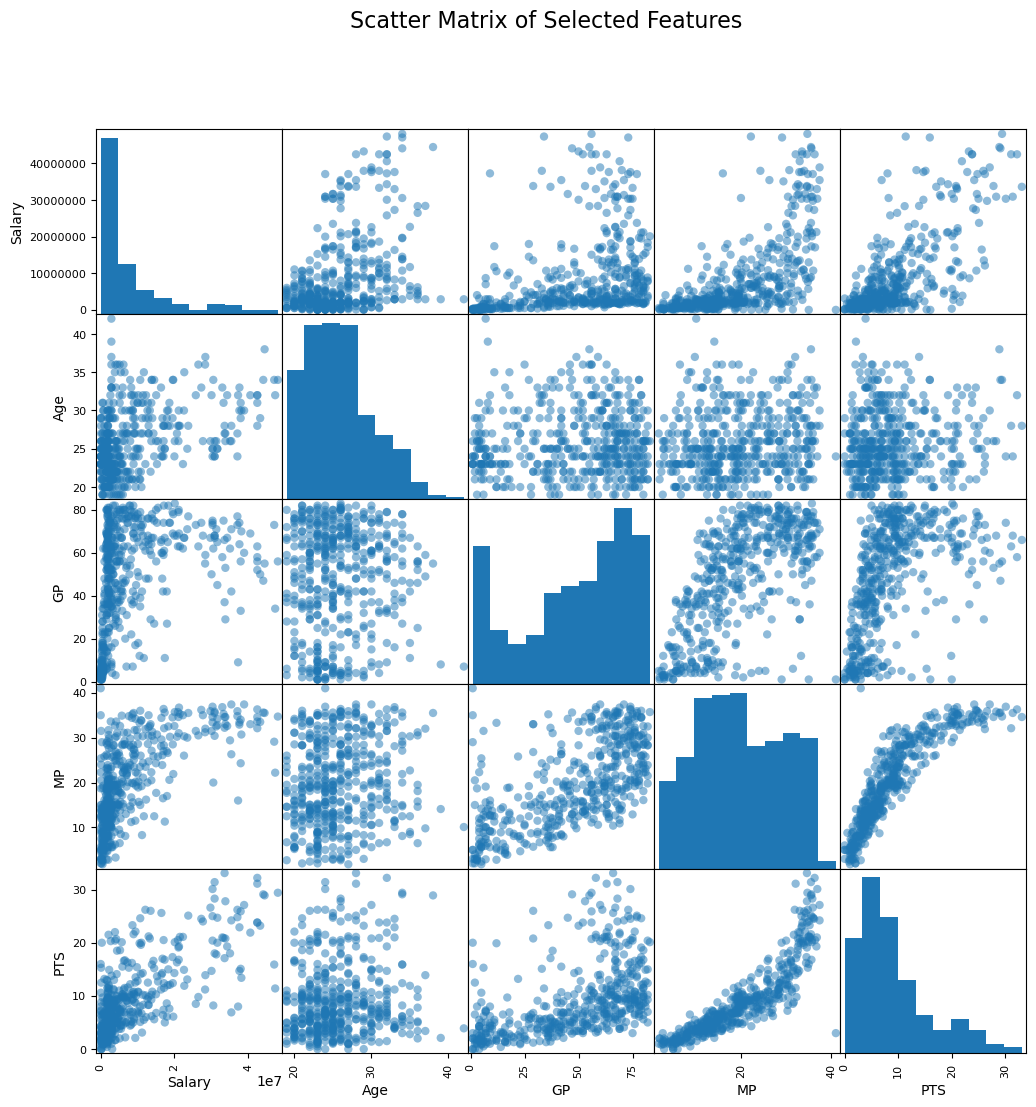

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

selected_features = ['Salary', 'Age', 'GP', 'MP', 'PTS']
selected_df = df[selected_features]

scatter_matrix = pd.plotting.scatter_matrix(selected_df, figsize=(12, 12), diagonal='hist', marker='o', alpha=0.5)
plt.suptitle('Scatter Matrix of Selected Features', fontsize=16)
plt.show()


# Linear Regression

R^2 Score on Training Set: 0.15857330398700664
Mean Squared Error on Training Set: 88922504853653.94


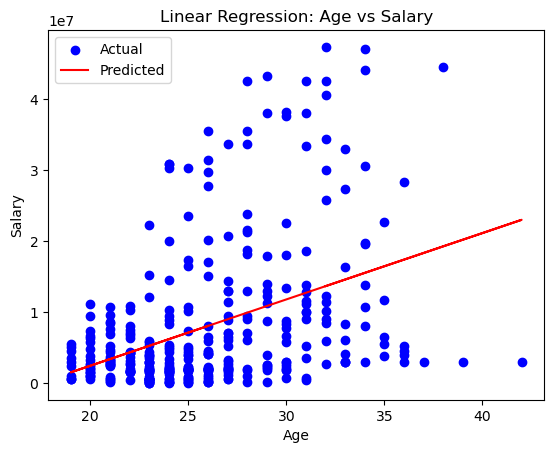

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()

X_train_age = X_train[['Age']]
y_train_salary = y_train

model.fit(X_train_age, y_train_salary)

y_train_pred = model.predict(X_train_age)
r2_train = r2_score(y_train_salary, y_train_pred)
mse_train = mean_squared_error(y_train_salary, y_train_pred)

print("R^2 Score on Training Set:", r2_train)
print("Mean Squared Error on Training Set:", mse_train)

plt.scatter(X_train_age, y_train_salary, color='blue', label='Actual')
plt.plot(X_train_age, y_train_pred, color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Linear Regression: Age vs Salary')
plt.legend()
plt.show()


The linear regression model's performance in predicting salaries based solely on age is relatively poor, as indicated by the low R^2 score of approximately 0.159 and the high mean squared error (MSE) of approximately 8.89e13.

# Considering More Features

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()

selected_features = ['Age', 'PTS', 'TRB', 'AST']  
X_train_selected = X_train[selected_features]

model.fit(X_train_selected, y_train)

y_train_pred = model.predict(X_train_selected)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

print("R^2 Score on Training Set:", r2_train)
print("Mean Squared Error on Training Set:", mse_train)



R^2 Score on Training Set: 0.6248350961795603
Mean Squared Error on Training Set: 39647664067433.51


The updated linear regression model, incorporating age alongside additional features ('PTS', 'TRB', and 'AST'), demonstrates significant improvement in performance compared to the previous model.
The R^2 score has increased substantially to 0.625. This indicates that around 62.5% of the variance in salaries can now be explained by age and the selected additional features, showcasing the model's enhanced ability to capture the variation in salary.
The mean squared error (MSE) has notably decreased to approximately 3.96e13. This reduction in MSE suggests that the predicted salaries are now closer to the actual salaries on average, highlighting the improved accuracy of the model.

# Adding new Feature to Model

R^2 Score on Training Set with PositionCat: 0.0010623487142056298
Mean Squared Error on Training Set with PositionCat: 105568362123356.06


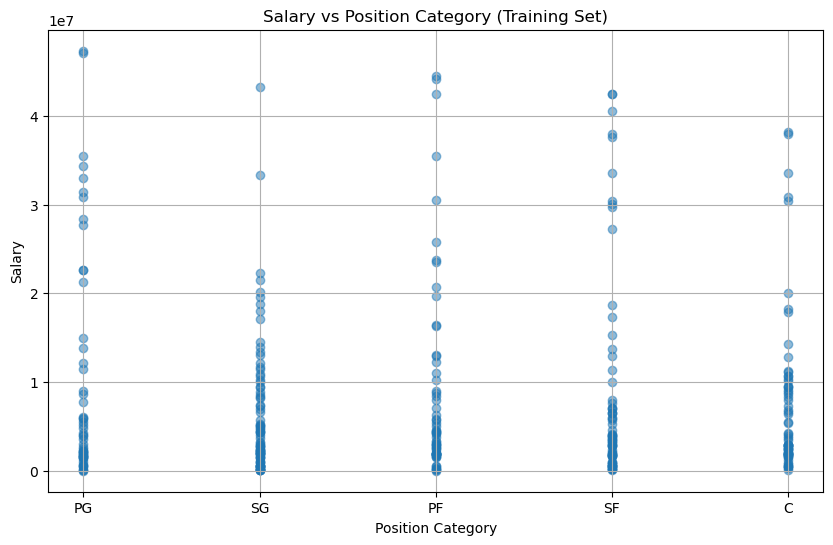

In [8]:
import matplotlib.pyplot as plt

def map_position_category(position):
    if 'PG' in position:
        return 1
    elif 'SG' in position:
        return 2
    elif 'PF' in position:
        return 3
    elif 'SF' in position:
        return 4
    elif 'C' in position:
        return 5

X_train['PositionCat'] = X_train['Position'].apply(map_position_category)

y_train_salary = y_train

X_train_position_cat = X_train[['PositionCat']]

model_position_cat = LinearRegression()

model_position_cat.fit(X_train_position_cat, y_train_salary)

y_train_pred_position_cat = model_position_cat.predict(X_train_position_cat)

r2_train_position_cat = r2_score(y_train_salary, y_train_pred_position_cat)
mse_train_position_cat = mean_squared_error(y_train_salary, y_train_pred_position_cat)

print("R^2 Score on Training Set with PositionCat:", r2_train_position_cat)
print("Mean Squared Error on Training Set with PositionCat:", mse_train_position_cat)

plt.figure(figsize=(10, 6))
plt.scatter(X_train['PositionCat'], y_train_salary, alpha=0.5)
plt.title('Salary vs Position Category (Training Set)')
plt.xlabel('Position Category')
plt.ylabel('Salary')
plt.xticks([1, 2, 3, 4, 5], ['PG', 'SG', 'PF', 'SF', 'C'])
plt.grid(True)
plt.show()

The addition of the 'PositionCat' feature, which represents player positions, shows minimal impact on the predictive performance of the linear regression model. The R^2 score remains extremely low at approximately 0.001. This suggests that player positions do not provide significant insight into salary prediction. Similarly, the mean squared error (MSE) remains high.

# Polynomial Features

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


X_original_train = X_train[['Age', 'PTS', 'TRB', 'AST']]

X_position_train = X_train[['PositionCat']]

poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_original_train)

X_train_combined = np.concatenate((X_poly_train, X_position_train), axis=1)

model = LinearRegression()
model.fit(X_train_combined, y_train)

y_pred_train = model.predict(X_train_combined)

r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print("R^2 Score with Polynomial Features on Training Set:", r2_train)
print("Mean Squared Error with Polynomial Features on Training Set:", mse_train)


R^2 Score with Polynomial Features on Training Set: 0.768059666118857
Mean Squared Error with Polynomial Features on Training Set: 24511601026009.715


 The inclusion of polynomial features of degree 3, alongside the original player attributes and positional category, has led to a enhancement in the model's predictive performance. With an R^2 score of approximately 0.768, the model now accounts for around 76.8% of the variance in NBA player salaries. Additionally, the significantly reduced mean squared error (MSE) of approximately 2.45e13 indicates that the model's predictions are substantially closer to the actual salaries, highlighting its improved accuracy in estimating player earnings.

# With Ridge Regression

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_model = Ridge()

parameters = {'alpha': [0.1, 1, 10, 100]}  # Test different values of alpha

ridge_grid = GridSearchCV(ridge_model, parameters, cv=5)
ridge_grid.fit(X_train_combined, y_train)

best_ridge_model = ridge_grid.best_estimator_

y_pred_train_ridge = best_ridge_model.predict(X_train_combined)

r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)

print("R^2 Score with Ridge Regression on Training Set:", r2_train_ridge)
print("Mean Squared Error with Ridge Regression on Training Set:", mse_train_ridge)


R^2 Score with Ridge Regression on Training Set: 0.7527311484694323
Mean Squared Error with Ridge Regression on Training Set: 26131528455860.64


In comparing the metrics between the polynomial features linear regression model and the Ridge regression model, it's observed that the polynomial features linear regression model exhibits a slightly higher R-squared score of 0.768 compared to Ridge regression's score of 0.753 on the training set. Additionally, the mean squared error (MSE) of the polynomial features linear regression model is slightly lower at approximately 24.5 trillion compared to Ridge regression's MSE of around 26.1 trillion. While the polynomial features linear regression model seems to perform marginally better in terms of both R-squared score and MSE on the training set, it's essential to consider the potential overfitting associated with polynomial features and the regularization benefits offered by Ridge regression for generalization on unseen data.

# Modifying data for better results 
## Building Decision Tree

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("nba_2022-23_all_stats_with_salary.csv")


df.fillna(0, inplace=True)


df['Salary'] = df['Salary'] / 1000000


df['Total Shots'] = df['2PA'] + df['3PA']


total_shots_mask = df['Total Shots'] > 0
trb_mask = df['TRB'] > 0

df_filtered = df.loc[total_shots_mask & trb_mask]


df['Shot Ratio'] = df['3PA'] / df['Total Shots']

df['Rebound Ratio'] = df['DRB'] / df['TRB']


position_mapping = {'PG': 0, 'SG': 1, 'PF': 2, 'SF': 3, 'C': 4}

df['Position_Num'] = df['Position'].apply(lambda x: position_mapping.get(x[:2], -1))


X = df[['Shot Ratio', 'Rebound Ratio']]  # Features
y = df['Position_Num']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df[['Shot Ratio', 'Rebound Ratio', 'Age', 'GP']]
y = df['Position'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Confusionmatrix

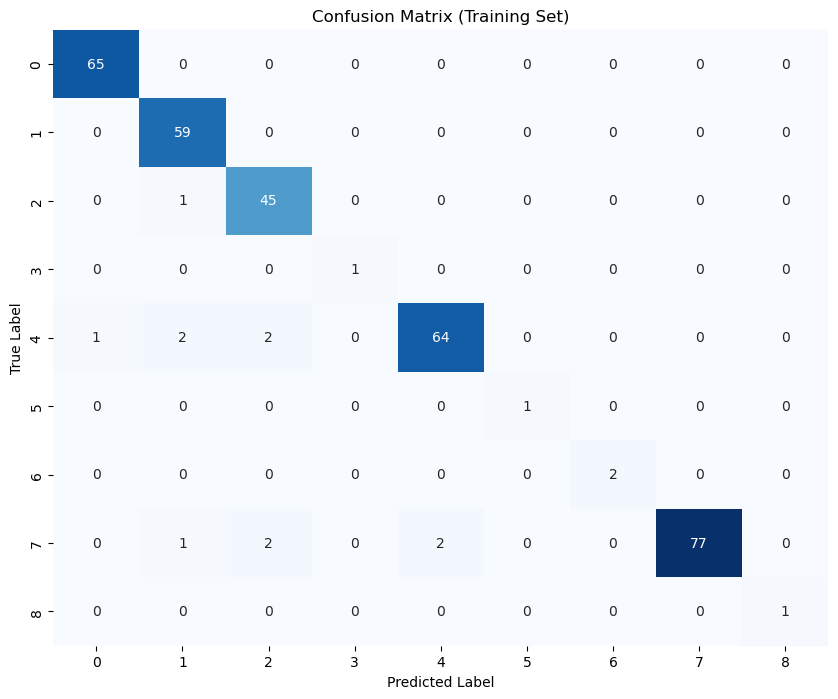

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_train = confusion_matrix(y_train, clf.predict(X_train))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Training Set)')
plt.show()

The confusion matrix provides insights into the performance of the classification model. Notably, it demonstrates that the model generally performs well in identifying players belonging to different positions, with relatively low numbers of false positives and false negatives. However, there are areas for improvement, particularly in reducing false negatives for Small Forwards and Shooting Guards. Overall, while the model shows promise, fine-tuning and additional analysis may help enhance its accuracy and effectiveness in predicting player positions.

# Evaluation

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)

precision = precision_score(y_train, y_train_pred, average='weighted')

recall = recall_score(y_train, y_train_pred, average='weighted')

f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9662576687116564
Precision: 0.9675555479674672
Recall: 0.9662576687116564
F1 Score: 0.9662329564503894


# Displaying the decision tree

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(clf, out_file='salary.dot', 
                feature_names=X.columns,
                class_names=clf.classes_,
                filled=True, rounded=True,
                special_characters=True)


In [20]:
from IPython.display import Image

png_path = 'salary.png'
Image(filename=png_path)

# Decision Tree Classifier

In [21]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

X = df[['Shot Ratio', 'Rebound Ratio', 'Age', 'GP']]
y = df['Position'] 

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

conf_matrices = []
accuracies = []
f1_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

for i in range(len(accuracies)):
    print(f"Fold {i+1}:")
    print("Confusion Matrix:")
    print(conf_matrices[i])
    print("Accuracy:", accuracies[i])
    print("F1 Score:", f1_scores[i])
    print()


Fold 1:
Confusion Matrix:
[[11  2  2  0  2  1  0]
 [ 1  2  5  1  3  5  0]
 [ 0  5  3  2  2  4  0]
 [ 0  1  0  0  0  0  0]
 [ 2  3  5  0  4  4  0]
 [ 0  2  5  1  6  9  0]
 [ 0  1  0  0  0  0  0]]
Accuracy: 0.30851063829787234
F1 Score: 0.3214527493782813

Fold 2:
Confusion Matrix:
[[11  2  1  3  0  2]
 [ 5  5  0  3  0  4]
 [ 2  6  0  4  0  4]
 [ 1  8  2  1  0  6]
 [ 0  1  0  0  0  0]
 [ 4  6  2  6  0  5]]
Accuracy: 0.23404255319148937
F1 Score: 0.2126170519787541

Fold 3:
Confusion Matrix:
[[9 3 3 1 0 2]
 [5 0 3 6 0 4]
 [3 2 5 3 0 2]
 [1 4 3 6 0 4]
 [0 0 0 1 0 0]
 [1 3 5 7 0 7]]
Accuracy: 0.2903225806451613
F1 Score: 0.2793338201307841

Fold 4:
Confusion Matrix:
[[12  2  0  0  1  0  3]
 [ 4  1  2  0  5  0  5]
 [ 3  1  6  1  4  0  0]
 [ 0  0  0  0  0  0  0]
 [ 3  6  1  0  4  0  5]
 [ 0  1  0  0  0  0  0]
 [ 2  3  4  0  5  0  9]]
Accuracy: 0.34408602150537637
F1 Score: 0.33345225707348497

Fold 5:
Confusion Matrix:
[[11  3  3  0  0  1  0]
 [ 3  3  2  0  6  3  0]
 [ 4  1  3  0  6  1  0]
 [

C:\Users\S560757\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
